In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data['data']
y = data['target']
print("shape of x: {}\nshape of y: {}".format(x.shape,y.shape))

shape of x: (569, 30)
shape of y: (569,)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [6]:

class custom_dataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.length = self.x.shape[0]
 
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]  
    def __len__(self):
        return self.length
    
dataset = custom_dataset(x,y)#DataLoader
trainset, testset= torch.utils.data.random_split(dataset, [300,269])
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)
testloader = DataLoader(testset,batch_size=64,shuffle=False)
for i,j in trainloader:
    print(i.shape)
    break

torch.Size([64, 30])


In [7]:

class Net(nn.Module):
    def __init__(self,input_shape):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_shape,32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,1)  
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [8]:
model=Net(30)
model

Net(
  (fc1): Linear(in_features=30, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [9]:
learning_rate = 0.01
epochs = 700
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [20]:
losses=[]
for i in range(epochs):
    for j,(x_train,y_train) in enumerate(trainloader):
        
        optimizer.zero_grad()
        output = model(x_train)
        loss = loss_fn(output,y_train.reshape(-1,1))
        loss.backward()
        optimizer.step()
        
    if i%50 == 0:
        print("\tepoch {}\tloss :{}".format(i,loss))
        losses.append(loss.detach().numpy())

	epoch 0	loss :0.022543925791978836
	epoch 50	loss :0.021406086161732674
	epoch 100	loss :0.02039557881653309
	epoch 150	loss :0.019421234726905823
	epoch 200	loss :0.018619218841195107
	epoch 250	loss :0.017888745293021202
	epoch 300	loss :0.01722276583313942
	epoch 350	loss :0.01657090149819851
	epoch 400	loss :0.015948645770549774
	epoch 450	loss :0.015369435772299767
	epoch 500	loss :0.014750976115465164
	epoch 550	loss :0.014132198877632618
	epoch 600	loss :0.0135419936850667
	epoch 650	loss :0.012994957156479359


In [23]:
true_labels = [] #for confusion matrix
predicted_labels = [] #for confusion matrix

with torch.no_grad():
    correct = 0
    total = 0
    for x_test,y_test in testloader:

        outputs = model(x_test)
        _, predicted = torch.max(outputs, 1)
        
        true_labels.extend(y_test.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())
                                
        total += y_test.size(0)
        correct += (predicted == y_test).sum().item()

    accuracy= 100 * correct / total
    print('Accuracy: {} %'.format(accuracy))
    top1_error = 100 - accuracy
    print('Top-1 Error: {} %'.format(top1_error))


Accuracy: 40.520446096654275 %
Top-1 Error: 59.479553903345725 %


Text(0, 0.5, 'loss')

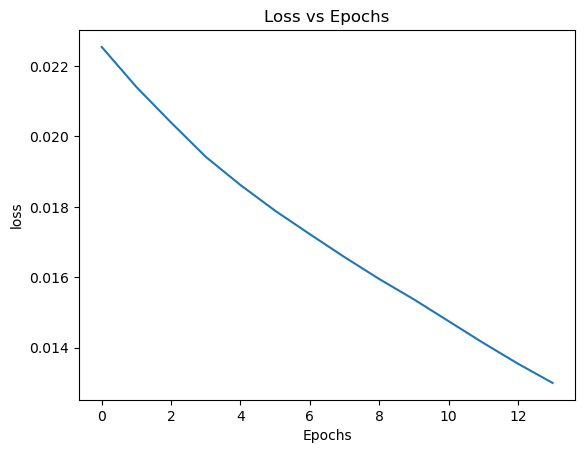

In [24]:
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

In [27]:
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
confusion = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(num_classes, num_classes))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'num_classes' is not defined